In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


In [3]:
x_train = np.load("x_train.npy")
t_train = np.load("y_train.npy")
x_test = np.load("x_test.npy")
t_test = np.load("y_test.npy")


## 1. Compute the mean vectors mi, (i=1,2) of each 2 classes

In [5]:
c = 2  # The number of class
x_train_1 = x_train[np.where(t_train == 0)].T
x_train_2 = x_train[np.where(t_train == 1)].T
m1 = np.mean(x_train_1, axis=1)
m1 = np.mean(x_train_1, axis=1).reshape(-1, 1)
m2 = np.mean(x_train_2, axis=1).reshape(-1, 1)

print(f"mean vector of class 1:\n {m1}")
print(f"mean vector of class 2:\n {m2}")


mean vector of class 1:
 [[ 1.3559426 ]
 [-1.34746216]]
mean vector of class 2:
 [[-1.29735587]
 [ 1.29096203]]


## 2. Compute the Within-class scatter matrix SW

In [4]:
Sw = np.dot((x_train_1 - m1), (x_train_1 - m1).T) +\
     np.dot((x_train_2 - m2), (x_train_2 - m2).T)

# Sw = np.cov(x_train_1) + np.cov(x_train_2)
assert Sw.shape == (2, 2)
print(f"Within-class scatter matrix SW:\n {Sw}")


Within-class scatter matrix SW:
 [[ 388.64001349 -228.92177708]
 [-228.92177708  665.56910433]]


## 3.  Compute the Between-class scatter matrix SB

In [5]:
SB = np.dot((m2 - m1), (m2 - m1).T)
assert SB.shape == (2, 2)
print(f"Between-class scatter matrix SB:\n {SB}")


Between-class scatter matrix SB:
 [[ 7.03999279 -7.00052687]
 [-7.00052687  6.9612822 ]]


## 4. Compute the Fisher’s linear discriminant

In [6]:
Sw_inv = np.linalg.inv(Sw)
w, v = np.linalg.eig(np.dot(Sw_inv, SB))
weight = v[:, np.argmax(w)].reshape(-1, 1)

assert weight.shape == (2, 1)
print(f" Fisher’s linear discriminant:\n {weight}")


 Fisher’s linear discriminant:
 [[ 0.94096648]
 [-0.33849976]]


## 5. Project the test data by linear discriminant to get the class prediction by nearest-neighbor rule and calculate the accuracy score

In [7]:
y_train = np.dot(x_train, weight)
y_test = np.dot(x_test, weight)

test_pred = np.zeros((x_test.shape[0], 1))
for i in range(x_test.shape[0]):
    test_pred[i, 0] = t_train[np.argmin(np.absolute(y_test[i] *
                                                    np.ones(y_train.shape) -
                                                    y_train))]

acc = accuracy_score(test_pred, t_test)
print(f"Accuracy of test-set = {acc}")


Accuracy of test-set = 0.916


## 6. Plot

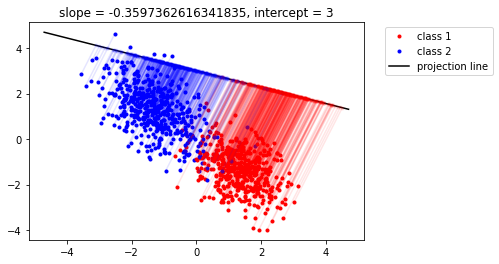

In [8]:
x_test_1 = x_test[np.where(t_test == 0)].T
x_test_2 = x_test[np.where(t_test == 1)].T
intercept = 3

plt.figure()
plt.plot(x_train_1[0, :], x_train_1[1, :], 'r.', label='class 1')
plt.plot(x_train_2[0, :], x_train_2[1, :], 'b.', label='class 2')
plt.plot(x_test_1[0, :], x_test_1[1, :], 'r.')
plt.plot(x_test_2[0, :], x_test_2[1, :], 'b.')
plt.plot([-5 * weight[0], 5 * weight[0]],
         [-5 * weight[1] + intercept, 5 * weight[1] + intercept], 'k',
         label='projection line')
slope = weight[1] / weight[0]
plt.title(f'slope = {slope.item(0)}, intercept = {intercept}')
res = weight.reshape(2,)

for pt in x_train_1.T:
    pt[1] = pt[1] - intercept
    prj = np.multiply(res, np.dot(res, pt))
    plt.plot([prj[0], pt[0]], [prj[1] + intercept, pt[1] + intercept],
             'r.-', alpha=0.1)
for pt in x_train_2.T:
    pt[1] = pt[1] - intercept
    prj = np.multiply(res, np.dot(res, pt))
    plt.plot([prj[0], pt[0]], [prj[1] + intercept, pt[1] + intercept],
             'b.-', alpha=0.1)
for pt in x_test_1.T:
    pt[1] = pt[1] - intercept
    prj = np.multiply(res, np.dot(res, pt))
    plt.plot([prj[0], pt[0]], [prj[1] + intercept, pt[1] + intercept],
             'r.-', alpha=0.1)
for pt in x_test_2.T:
    pt[1] = pt[1] - intercept
    prj = np.multiply(res, np.dot(res, pt))
    plt.plot([prj[0], pt[0]], [prj[1] + intercept, pt[1] + intercept],
             'b.-', alpha=0.1)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()
